# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2384 Федоров М.В. и Муравин Е.Е.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).


# Основные теоретические положения

## Формирование аналогового и дискретного сигнала

В работе рассматривается непрерывный аналоговый сигнал, представляющий собой линейную комбинацию косинусоид:

$$
x(t) = \sum_{k=0}^{10} A_k \cos(\omega_k t + \phi_k),
$$

где:  
- $A_k$ — амплитуды гармоник (случайные целые значения от 1 до 11),  
- $omega_k$ — частоты гармоник, равномерно распределённые от 0 до $\pi$ с шагом $\Delta\omega = 0.1\pi$,  
- $\phi_k$ — случайные начальные фазы в диапазоне \([0, 0.5]\).

Дискретизация проводится с шагом \(T = 1\), поэтому дискретный сигнал задаётся выражением:

$$
x[n] = x(t=n) = \sum_{k=0}^{10} A_k \cos(\omega_k n + \phi_k), \quad n=0,1,\dots,31.
$$

Таким образом формируется последовательность из 32 отсчётов (\(N = 32\)).

---

## Дискретное преобразование Фурье

Спектральные отсчёты дискретного сигнала находятся с помощью ДПФ:

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i\frac{2\pi}{N}kn}, \quad k=0,\dots,N-1.
$$

ДПФ позволяет получить частотное представление сигнала и визуализировать его спектр.

---

## Нерекурсивные фильтры

Нерекурсивные фильтры (FIR-фильтры) основаны на полиномиальном сглаживании и имеют передаточную функцию вида:

$$H(\omega) = \sum_{k=-m}^{m} h_k e^{-i\omega k}$$

где $h_k$ — коэффициенты фильтра, определяемые методом наименьших квадратов при аппроксимации полиномом.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 32
T = 1

## 1.Сформировать дискретный сигнал посредством дискретизации с шагом  T = 1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1 \pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчёта (N = 31).

In [2]:
np.random.seed(16)
n = 11

w = np.arange(0, n) * 0.1 * np.pi

A = np.random.randint(1, 12, size=n)
A = A  / np.sum(A)

phi = np.random.uniform(0, 0.5, size=n)

print('коэффициенты гармонических сигналов:')
print(f'w: {[round(wi, 4) for wi in w]}')
print(f'A: {A}')
print(f'ф: {[round(p, 4) for p in phi]}')

коэффициенты гармонических сигналов:
w: [np.float64(0.0), np.float64(0.3142), np.float64(0.6283), np.float64(0.9425), np.float64(1.2566), np.float64(1.5708), np.float64(1.885), np.float64(2.1991), np.float64(2.5133), np.float64(2.8274), np.float64(3.1416)]
A: [0.14285714 0.14285714 0.08571429 0.02857143 0.07142857 0.07142857
 0.14285714 0.01428571 0.01428571 0.12857143 0.15714286]
ф: [np.float64(0.0352), np.float64(0.4705), np.float64(0.2818), np.float64(0.039), np.float64(0.3613), np.float64(0.0792), np.float64(0.1251), np.float64(0.1467), np.float64(0.3483), np.float64(0.2321), np.float64(0.1075)]


## 2.Визуализировать исходные аналоговый и дискретизированный сигналы.

Исходный аналоговый сигнал:

$$s(t) = \sum_{k=0}^{10} A_k \cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:

$$s[n] = \sum_{k=0}^{10} A_k \cos(\omega_k n + \varphi_k), \quad n = 0, 1, \ldots, 31$$

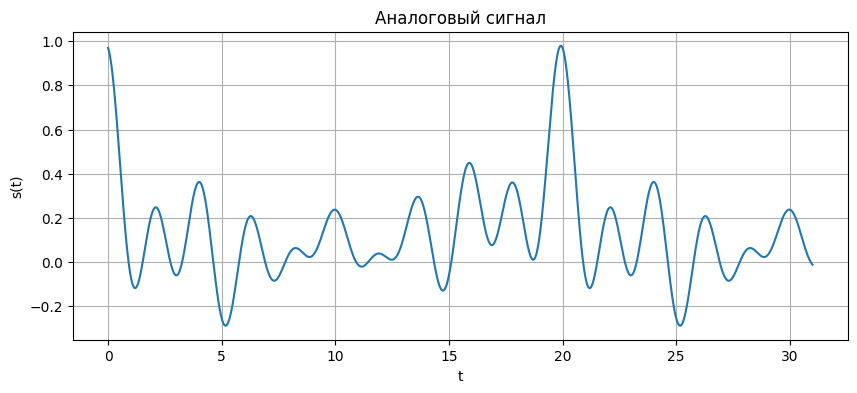

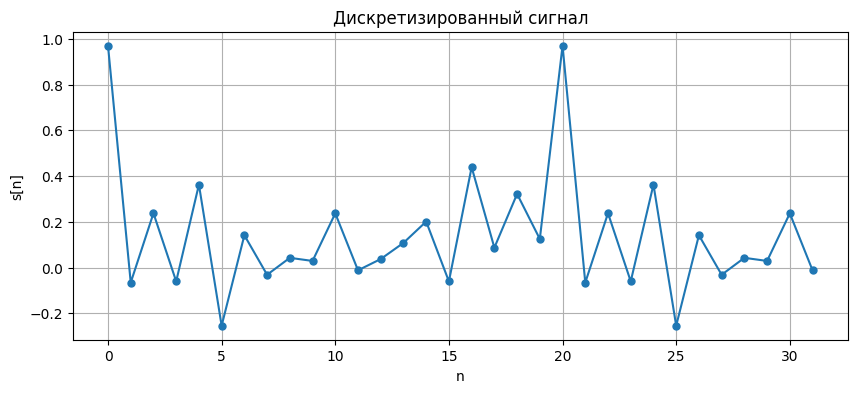

In [3]:
def s(t):
    return sum((A[i] * np.cos(w[i] * t + phi[i]) for i in range(n)))

X_n = [*range(N)]
S_n = [s(x) for x in X_n]

X_t = np.linspace(0, N - 1, 1000)
S_t = [s(x) for x in X_t]

plt.figure(figsize=(10, 4))
plt.plot(X_t, S_t)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Аналоговый сигнал')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретизированный сигнал')
plt.grid(True)
plt.show()

## 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

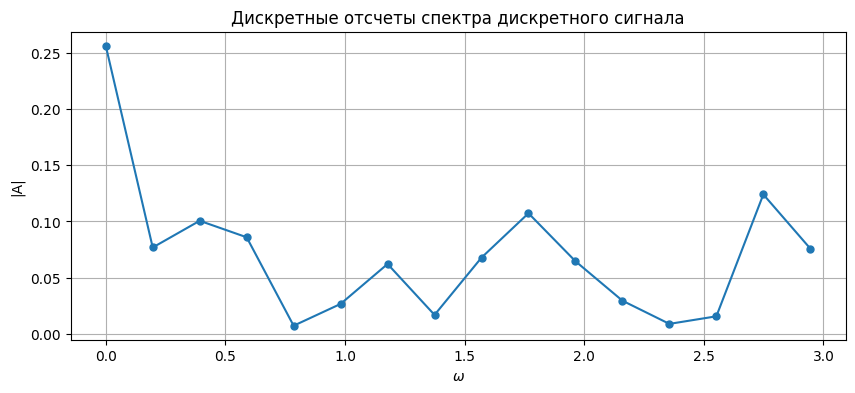

In [4]:
W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi
F = np.fft.fft(S_t, norm='forward')[:N // 2] * 2

plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o-', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала')
plt.grid(True)
plt.show()

## 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.

In [5]:
def L(n, S):
    m = (n - 1) // 2
    y = [np.sum(S[i - m: i + m + 1]) / n for i in range(m, len(S) - m)]
    return np.array([0] * m + y + [0] * m)

Y_L_5 = L(5, S_n)
Y_L_9 = L(9, S_n)

**Линейное сглаживание по 5 точкам:**

Фильтр усредняет значение сигнала в окрестности точки \(n\):

$$
y[n] = \frac{1}{5}\big(x[n-2] + x[n-1] + x[n] + x[n+1] + x[n+2]\big)
$$

Его частотная характеристика имеет вид:

$$
H(\omega) = \frac{1}{5}\left(e^{2i\omega} + e^{i\omega} + 1 + e^{-i\omega} + e^{-2i\omega}\right)
= \frac{1 + 2\cos(\omega) + 2\cos(2\omega)}{5}
$$

---

**Линейное сглаживание по 9 точкам:**

Сигнал усредняется по окну из девяти последовательных отсчётов:

$$
y[n] = \frac{1}{9}\sum_{k=-4}^{4} x[n+k]
$$

Соответствующая передаточная функция:

$$
H(\omega) = \frac{1 + 2\sum_{k=1}^{4}\cos(k\omega)}{9}
$$


## 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

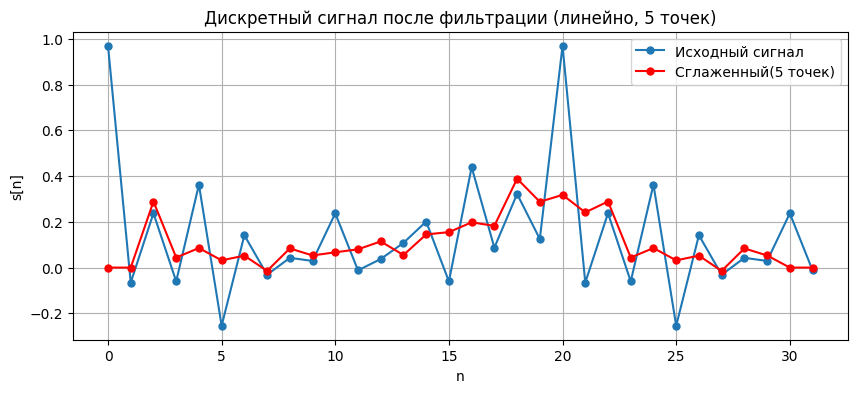

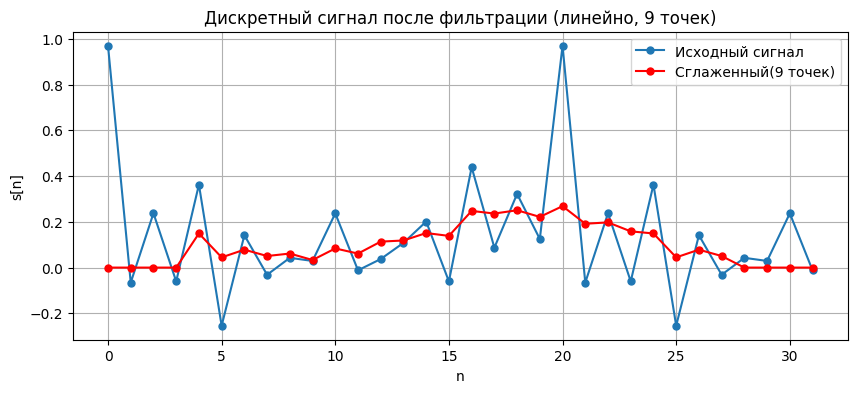

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_L_5, 'o-', color='r', label='Сглаженный(5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после фильтрации (линейно, 5 точек)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_L_9, 'o-', color='r', label='Сглаженный(9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после фильтрации (линейно, 9 точек)')
plt.grid(True)
plt.legend()
plt.show()

## 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

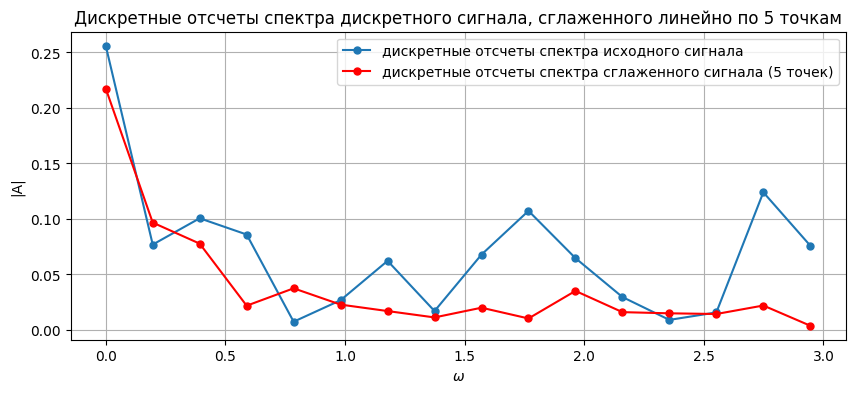

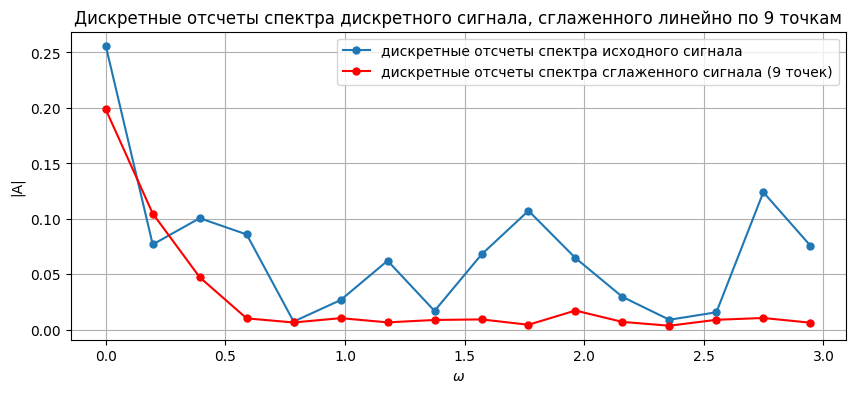

In [7]:
F_L_5 = np.fft.fft(Y_L_5, norm='forward')[:N // 2] * 2
F_L_9 = np.fft.fft(Y_L_9, norm='forward')[:N // 2] * 2

plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o-', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_5], 'o-', color='r', label='дискретные отсчеты спектра сглаженного сигнала (5 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного линейно по 5 точкам')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o-', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_9], 'o-', color='r', label='дискретные отсчеты спектра сглаженного сигнала (9 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного линейно по 9 точкам')
plt.grid(True)
plt.legend()
plt.show()

## 7. Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

Наблюдаемый эффект сглаживания спектра подтверждает правильность работы фильтра: высокочастотные составляющие подавляются, и это подавление усиливается с ростом числа точек сглаживания. Полученная картина точно повторяет форму заданной частотной характеристики 𝐻(𝜔).

## 8. Повторить п. 4–7 для следующих фильтров:

a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

## Сглаживание полиномом 2-й степени по 5 и 9 точкам

Ниже приведены выражения для передаточных функций фильтров, основанных на аппроксимации полиномом второй степени.

**Сглаживание по 5 точкам:**

$$
y[n] = \frac{1}{35}\big(-3x[n-2] + 12x[n-1] + 17x[n] + 12x[n+1] - 3x[n+2]\big)
$$

Передаточная функция такого фильтра имеет вид:

$$
H(\omega) = \frac{-3\left(e^{2i\omega} + e^{-2i\omega}\right) + 12\left(e^{i\omega} + e^{-i\omega}\right) + 17}{35}
= \frac{17 + 24\cos(\omega) - 6\cos(2\omega)}{35}
$$

---

**Сглаживание по 9 точкам:**

$$
y[n] = \frac{1}{231}\big(-21x[n-4] + 14x[n-3] + 39x[n-2] + 54x[n-1] + 59x[n] + 54x[n+1] + 39x[n+2] + 14x[n+3] - 21x[n+4]\big)
$$

Соответствующая частотная характеристика:

$$
H(\omega) =
\frac{59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega)}{231}
$$


In [8]:
def S_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((-3 * S[i - 2] + 12 * S[i - 1] + 17 * S[i] + 12 * S[i + 1] - 3 * S[i + 2]) / 35)
    return ([0] * 2) + y + ([0] * 2)

def S_9(S):
    y = []
    for i in range(4, N - 4):
        y.append((
            -21 * S[i - 4] + 14 * S[i - 3] + 39 * S[i - 2] + 54 * S[i - 1] + 59 * S[i] + 54 * S[i + 1] + 39 * S[i + 2] + 14 * S[i + 3] - 21 * S[i + 4]) / 231)
    return ([0] * 4) + y + ([0] * 4)

Y_S_5 = S_5(S_n)
Y_S_9 = S_9(S_n)

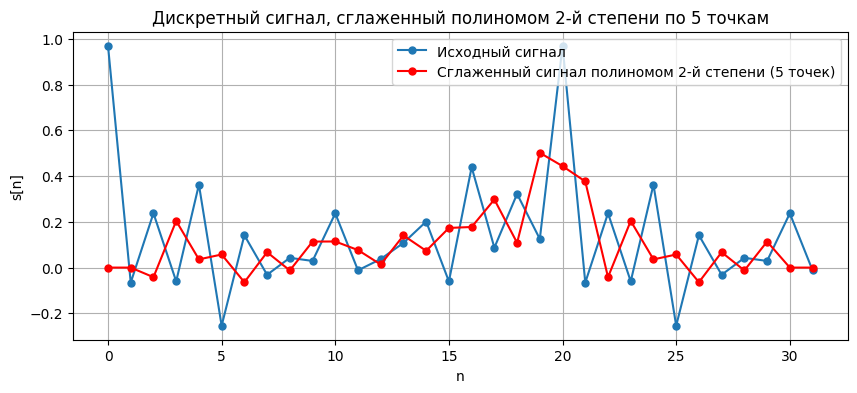

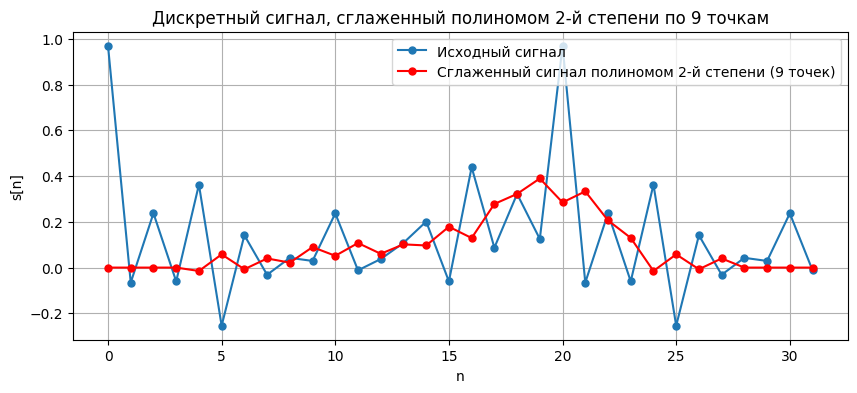

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_S_5, 'o-', color='r', label='Сглаженный сигнал полиномом 2-й степени (5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 2-й степени по 5 точкам')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_S_9, 'o-', color='r', label='Сглаженный сигнал полиномом 2-й степени (9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 2-й степени по 9 точкам')
plt.grid(True)
plt.legend()
plt.show()

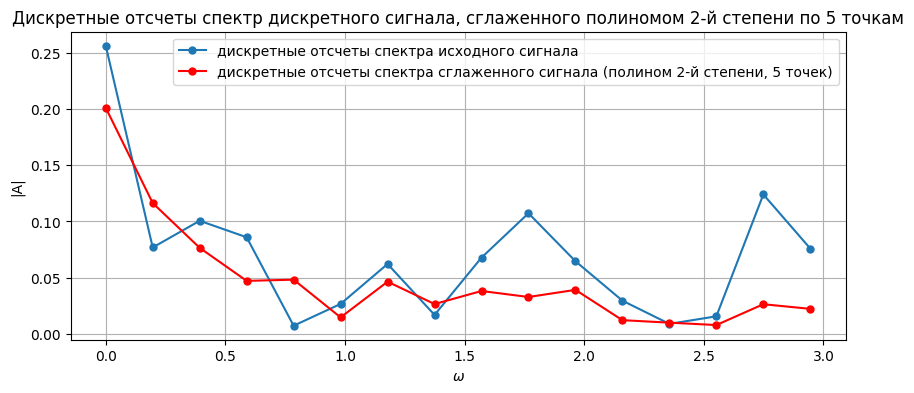

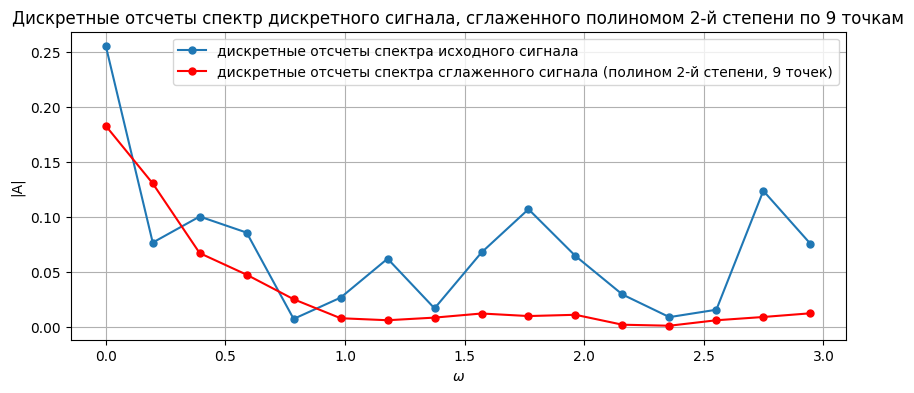

In [10]:
F_S_5 = np.fft.fft(Y_S_5, norm='forward')[:N // 2] * 2
F_S_9 = np.fft.fft(Y_S_9, norm='forward')[:N // 2] * 2

plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o-', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_S_5], 'o-', color='r', label='дискретные отсчеты спектра сглаженного сигнала (полином 2-й степени, 5 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектр дискретного сигнала, сглаженного полиномом 2-й степени по 5 точкам')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o-', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_S_9], 'o-', color='r', label='дискретные отсчеты спектра сглаженного сигнала (полином 2-й степени, 9 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектр дискретного сигнала, сглаженного полиномом 2-й степени по 9 точкам')
plt.grid(True)
plt.legend()
plt.show()

## Проанализировать результат на соответствие значениям H(ω). Сделать выводы.

Анализ графиков показывает, что по сравнению с предыдущим фильтром данный фильтр обладает более широкой, но плавно сужающейся с ростом частоты полосой пропускания. С увеличением точек сглаживания полоса сужается, что полностью соответствует теоретической характеристике H(ω).

Полиномиальные фильтры второго порядка демонстрируют менее агрессивное поведение, чем линейное усреднение. Они эффективнее сохраняют амплитуду низкочастотных составляющих, особенно на малых частотах. В отличие от резкого подавления, характерного для линейного усреднения (обусловленного нулями в H(ω)), данный фильтр обеспечивает плавный спад амплитуды, что исключает появление глубоких провалов в спектре.

## Сглаживание полиномом 4-й степени по 7 и 11 точкам

Ниже приведены выражения для фильтров, основанных на аппроксимации полиномом четвёртой степени, а также их частотные характеристики.

**Сглаживание по 7 точкам:**

$$
y[n] = \frac{1}{231}\big(5x[n-3] - 30x[n-2] + 75x[n-1] + 131x[n] + 75x[n+1] - 30x[n+2] + 5x[n+3]\big)
$$

Частотная характеристика имеет вид:

$$
H(\omega) = \frac{131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega)}{231}
$$

---

**Сглаживание по 11 точкам:**

$$
y[n] = \frac{1}{429}\big(18x[n-5] - 45x[n-4] - 10x[n-3] + 60x[n-2] + 120x[n-1] + 143x[n] + 120x[n+1] + 60x[n+2] - 10x[n+3] - 45x[n+4] + 18x[n+5]\big)
$$

Передаточная функция для этого окна:

$$
H(\omega) = \frac{143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega)}{429}
$$


In [11]:
def Q_7(S):
    y = []
    for i in range(3, N - 3):
        y.append((5 * S[i - 3] - 30 * S[i - 2] + 75 * S[i - 1] + 131 * S[i] + 75 * S[i + 1] - 30 * S[i + 2] + 5 * S[i + 3]) / 231)
    return ([0] * 3) + y + ([0] * 3)

def Q_11(S):
    y = []
    for i in range(5, N - 5):
        y.append((18 * S[i - 5] - 45 * S[i - 4] - 10 * S[i - 3] + 60 * S[i - 2] + 120 * S[i - 1] + 143 * S[i] + 120 * S[i + 1] + 60 * S[i + 2] - 10 * S[i + 3] - 45 * S[i + 4] + 18 * S[i + 5]) / 429)
    return ([0] * 5) + y + ([0] * 5)

Y_Q_7 = Q_7(S_n)
Y_Q_11 = Q_11(S_n)

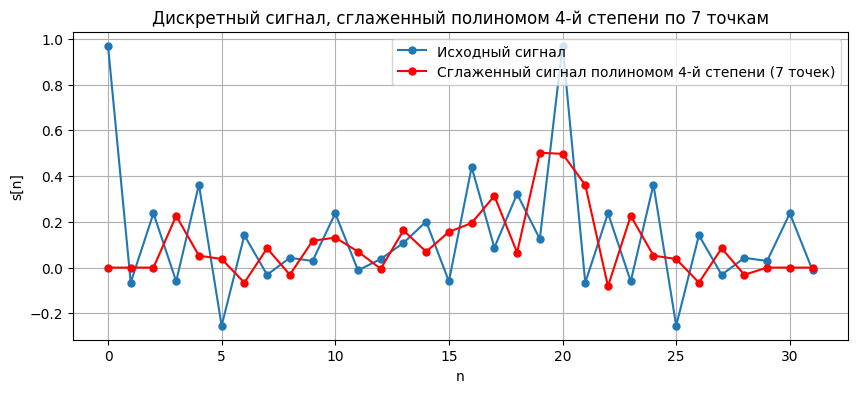

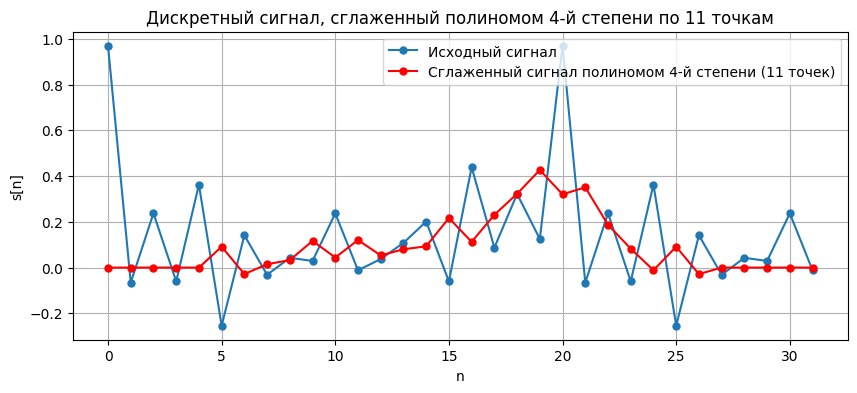

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_Q_7, 'o-', color='r', label='Сглаженный сигнал полиномом 4-й степени (7 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 4-й степени по 7 точкам')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_Q_11, 'o-', color='r', label='Сглаженный сигнал полиномом 4-й степени (11 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, сглаженный полиномом 4-й степени по 11 точкам')
plt.grid(True)
plt.legend()
plt.show()

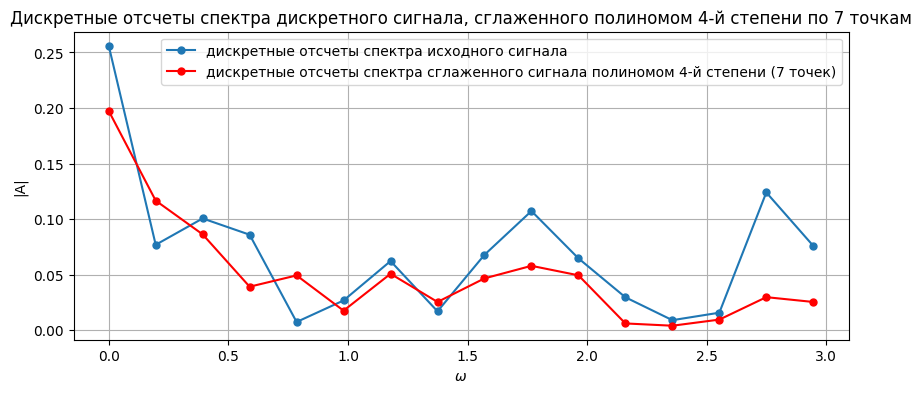

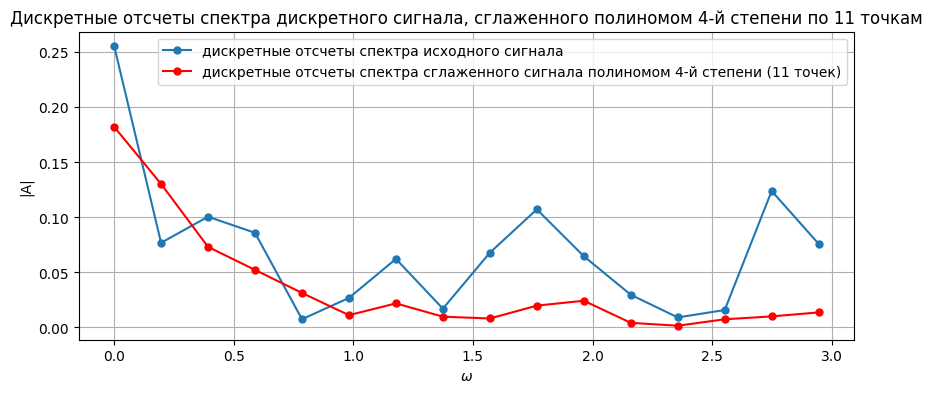

In [13]:
F_Q_7 = np.fft.fft(Y_Q_7, norm='forward')[:N // 2] * 2
F_Q_11 = np.fft.fft(Y_Q_11, norm='forward')[:N // 2] * 2

plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o-', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_Q_7], 'o-', color='r', label='дискретные отсчеты спектра сглаженного сигнала полиномом 4-й степени (7 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного полиномом 4-й степени по 7 точкам')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o-', label='дискретные отсчеты спектра исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_Q_11], 'o-', color='r', label='дискретные отсчеты спектра сглаженного сигнала полиномом 4-й степени (11 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра дискретного сигнала, сглаженного полиномом 4-й степени по 11 точкам')
plt.grid(True)
plt.legend()
plt.show()

## Проанализировать результат на соответствие значениям H(ω). Сделать выводы.


Проведённое сравнение с фильтром второго порядка показывает, что фильтр четвёртого порядка обладает более широкой полосой пропускания, что способствует лучшему сохранению низкочастотных составляющих сигнала. Полоса плавно сужается с удалением от нулевой частоты, а увеличение точек сглаживания приводит к её дополнительному сужению, что полностью согласуется с теоретической характеристикой H(ω).

Благодаря повышенной степени аппроксимации, фильтр точнее следует за локальной формой сигнала, минимизируя искажения амплитуд низкочастотных гармоник. Однако с увеличением длины окна усиливается подавление высоких частот: хотя это обеспечивает большее сглаживание, оно неизбежно приводит к потере детализации быстрых изменений.

## Выводы

В рамках лабораторной работы проведено исследование воздействия нерекурсивных сглаживающих фильтров на дискретизированный сигнал, представленный суммой косинусоидальных компонент. Анализ проводился в частотной области с использованием дискретного преобразования Фурье (ДПФ).

Были протестированы три метода фильтрации:

- Метод линейного сглаживания (на 5 и 9 точках) проявил свойства фильтра нижних частот с узкой полосой пропускания, что обеспечивает эффективное подавление шума, однако приводит к существенному искажению формы полезного сигнала.
- Сглаживание полиномом 2-й степени (на 5 и 9 точках) характеризуется более широкой полосой пропускания по сравнению с линейным методом. Это позволяет в большей степени сохранить форму исходного сигнала, хотя и снижает степень подавления высокочастотного шума.
- Сглаживание полиномом 4-й степени (на 7 и 11 точках) обладает наибольшей полосой пропускания, что минимизирует искажения полезного сигнала, эффективно отсекая лишь высочайшие частоты.

На результаты фильтрации влияют два ключевых параметра:

- Степень аппроксимирующего полинома $\rightarrow$ Рост степени приводит к расширению полосы пропускания, уменьшая искажения сигнала, но снижая уровень подавления шума.
- Количество точек $\rightarrow$ Увеличение количества точек сужает полосу пропускания, усиливая сглаживание и подавление высоких частот.